<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/codigos/Script_Clase_8_%C3%81rboles_y_Ensambles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad de los Andes

### 👨‍🏫 Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilo-vega-169084b1/)
- **Asistente de Docencia:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergio-julian-zona-moreno/)

## 📊 Algoritmos de árboles y ensambles

Este script implementa tres algoritmos principales:
1. Modelo Árbol de Decisión
2. Modelo Random Forest
3. Modelo XGBoost

### Objetivos:
- Implementar algoritmos de árboles y ensamble
- Evaluar modelos usando diferentes métricas
- Visualizar y comparar resultados

### Requisitos de Software:
- Conocimientos básicos de Python
- Familiaridad con NumPy y Pandas
- Comprensión básica de conceptos estadísticos

### Requisitos Técnicos:
- **Token de Hugging Face**: Necesario para acceder al dataset. Puedes obtener tu token en [Hugging Face](https://huggingface.co/settings/tokens)
- **Entorno de Ejecución**:
  - Recomendado: GPU T4 (Cambiar en: Runtime -> Change runtime type -> GPU)
  - Alternativa: CPU (el código funcionará, pero será más lento)
- **Memoria RAM**: Mínimo 4GB recomendados
- **Espacio en Disco**: ~200 GB para datasets y modelos

💡 **Nota**: Aunque recomendamos usar GPU para mayor velocidad, todo el código es compatible con CPU y funcionará correctamente, solo que tomará más tiempo en ejecutarse.

# 🛠️ Instalaciones Necesarias

Antes de comenzar, necesitamos instalar algunas librerías específicas para nuestro análisis. A continuación se listan las librerías y su propósito:

### Manejo de Datos y Cálculos
- **pandas**: Manipulación y análisis de datos tabulares. Esencial para trabajar con DataFrames y Series, permitiendo operaciones como filtrado, agrupación y transformación de datos
- **numpy**: Operaciones numéricas y matrices multidimensionales. Base fundamental para cálculos científicos y operaciones vectorizadas
- **scipy**: Funciones científicas y estadísticas avanzadas, incluyendo optimización, álgebra lineal y procesamiento de señales

### Hugging Face
- **huggingface_hub**: Acceso a modelos y datasets de Hugging Face. Permite descargar y utilizar modelos pre-entrenados y datasets de la comunidad
- **datasets**: Manejo eficiente de datasets de Hugging Face. Optimizado para grandes conjuntos de datos con funciones de carga streaming

### Visualización
- **matplotlib**: Biblioteca base para crear gráficos estáticos, desde simples gráficos de líneas hasta visualizaciones complejas personalizables
- **seaborn**: Construida sobre matplotlib, ofrece una interfaz de alto nivel para visualizaciones estadísticas con temas y paletas predefinidas
- **plotly**: Creación de gráficos interactivos para web, permitiendo zoom, hover y selección de datos
- **yellowbrick**: Visualizadores específicos para machine learning, incluyendo matrices de confusión, curvas ROC y visualizaciones de validación

### Machine Learning
- **scikit-learn**: Framework completo de machine learning que incluye algoritmos de clasificación, regresión, clustering y herramientas de preprocesamiento
- **imbalanced-learn**: Especializada en el manejo de datasets desbalanceados, proporcionando técnicas como SMOTE y diversos métodos de sampling

### Utilidades
- **tqdm**: Barras de progreso para monitorear el avance de procesos largos, compatible con bucles y operaciones iterativas
- **joblib**: Herramienta para paralelización de procesos y caching de resultados computacionales pesados
- **fsspec**: Sistema de archivos abstracto necesario para la compatibilidad con diferentes sistemas de almacenamiento

Ejecutemos la celda de código siguiente para instalar todas las librerías necesarias. La flag -q asegura una instalación silenciosa para mantener limpia la salida:

In [ ]:
# Instalación silenciosa de librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q fsspec==2024.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you ha

# 📊 Base de Datos: Default of Credit Card Clients

Para este ejercicio usaremos la base de datos "Default of Credit Card Clients" disponible en [Hugging Face](https://huggingface.co/datasets/scikit-learn/credit-card-clients), originalmente obtenida del repositorio UCI Machine Learning.

## 📝 Descripción
Esta base de datos contiene información sobre incumplimientos de pago, factores demográficos, datos crediticios, historial de pagos y estados de cuenta de clientes de tarjetas de crédito en Taiwán durante el período de abril a septiembre de 2005.

## 🔍 Variables Disponibles
La base contiene 25 variables:

### Información Personal
- **ID**: Identificador único de cada cliente
- **LIMIT_BAL**: Monto de crédito otorgado en dólares NT (incluye crédito individual y familiar)
- **SEX**: Género (1=masculino, 2=femenino)
- **EDUCATION**: Nivel educativo
 - 1 = Posgrado
 - 2 = Universidad
 - 3 = Secundaria
 - 4 = Otros
 - 5,6 = Desconocido
- **MARRIAGE**: Estado civil (1=casado, 2=soltero, 3=otros)
- **AGE**: Edad en años

### Historial de Pagos
- **PAY_0** a **PAY_6**: Estado de pago mensual (de septiembre a abril 2005)
 - -1 = Pago a tiempo
 - 1 = Retraso de un mes
 - 2 = Retraso de dos meses
 - ...
 - 9 = Retraso de nueve meses o más

### Estados de Cuenta
- **BILL_AMT1** a **BILL_AMT6**: Monto facturado mensual (septiembre a abril 2005)
- **PAY_AMT1** a **PAY_AMT6**: Monto pagado mensual (septiembre a abril 2005)

### Variable Objetivo
- **default.payment.next.month**: Incumplimiento de pago (1=sí, 0=no)

## 🎯 Objetivo
Utilizaremos esta base de datos para:
1. Predecir la probabilidad de incumplimiento de pago
2. Identificar los factores más importantes que influyen en el incumplimiento
3. Evaluar diferentes técnicas de árboles y ensamble
4. Analizar métricas de evaluación para modelos de clasificación

## 💡 Consideraciones
- Los montos están en dólares taiwaneses (NT)
- Los datos incluyen tanto variables numéricas como categóricas
- Es un problema de clasificación binaria (incumplimiento sí/no)
- Existe un desbalance natural en las clases (más pagos a tiempo que incumplimientos)

## Llamada de la base de datos

Por medio de la función streaming, vamos a tomar 10.000 datos aleatorios de la base de datos de HuggingFace. Posteriormente, vamos a estudiar los datos y su naturaleza.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset y lo mezclamos
dataset = load_dataset("scikit-learn/credit-card-clients", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))



README.md:   0%|          | 0.00/2.64k [00:00<?, ?B/s]

## 🛠️ PREPROCESAMIENTO DE DATOS

El preprocesamiento de datos es una fase fundamental en el desarrollo de modelos de machine learning. Esta etapa determina en gran medida la calidad y fiabilidad de nuestras predicciones, ya que transforma los datos crudos en un formato adecuado para el entrenamiento de modelos.

En esta sección desarrollaremos cuatro procesos esenciales:

* **Análisis estadístico descriptivo**: Examinaremos las distribuciones, tendencias centrales y dispersión de nuestras variables
* **Análisis de balance de clases**: Evaluaremos la proporción entre las clases de nuestra variable objetivo
* **Estandarización**: Transformaremos nuestras variables numéricas para que estén en escalas comparables
* **Codificación de variables categóricas**: Convertiremos las variables categóricas en formato numérico

Cada uno de estos pasos es crítico para garantizar que nuestros modelos puedan procesar los datos correctamente y generar predicciones confiables.


=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   LIMIT_BAL                   10000 non-null  float64
 2   SEX                         10000 non-null  int64  
 3   EDUCATION                   10000 non-null  int64  
 4   MARRIAGE                    10000 non-null  int64  
 5   AGE                         10000 non-null  int64  
 6   PAY_0                       10000 non-null  int64  
 7   PAY_2                       10000 non-null  int64  
 8   PAY_3                       10000 non-null  int64  
 9   PAY_4                       10000 non-null  int64  
 10  PAY_5                       10000 non-null  int64  
 11  PAY_6                       10000 non-null  int64  
 12  BILL_AMT1                   10000 non-null  int64  
 1

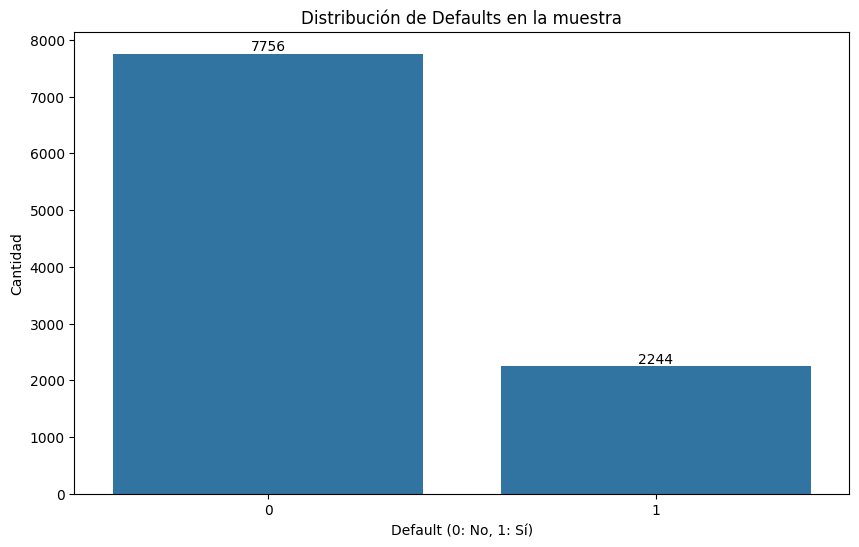

In [ ]:
# 1. Examinamos la información básica del DataFrame
print("\n=== Información del DataFrame ===")
print(df.info())

# 2. Verificamos los tipos de datos y valores únicos para cada columna
print("\n=== Valores únicos por columna ===")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Tipo de dato: {df[column].dtype}")
    print(f"Valores únicos: {df[column].nunique()}")
    print(f"Primeros valores únicos: {sorted(df[column].unique())[:5]}")

# 3. Verificamos valores nulos
print("\n=== Valores nulos ===")
print(df.isnull().sum())

# 4. Estadísticas descriptivas básicas
print("\n=== Estadísticas descriptivas ===")
print(df.describe())

# 5. Debalance de clases

print("📊 Distribución de la variable objetivo (default.payment.next.month):")
class_dist = df['default.payment.next.month'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default.payment.next.month')
plt.title('Distribución de Defaults en la muestra')
plt.xlabel('Default (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

In [ ]:
# Funciones de Preprocesamiento de datos

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def categorize_features(df):
    """
    Separa las características en numéricas y categóricas.
    """
    # Variables numéricas (montos y edad)
    numeric_features = [
        'LIMIT_BAL', 'AGE',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
    ]

    # Variables categóricas
    categorical_features = [
        'SEX', 'EDUCATION', 'MARRIAGE',
        'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
    ]

    return numeric_features, categorical_features

def clean_categorical_data(df):
    """
    Limpia y corrige valores en variables categóricas.
    """
    df = df.copy()

    # Corregir valores en EDUCATION
    # 0, 5 y 6 son valores no definidos, los convertimos a 4 (Others)
    df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

    # Corregir valores en MARRIAGE
    # 0 es un valor no definido, lo convertimos a 3 (Others)
    df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)

    return df

def preprocess_data(df):
    """
    Realiza el preprocesamiento completo de los datos.
    """
    # 1. Separar features
    numeric_features, categorical_features = categorize_features(df)

    # 2. Limpiar datos categóricos
    df = clean_categorical_data(df)

    # 3. Estandarizar variables numéricas
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # 4. Codificar variables categóricas
    label_encoders = {}
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature].astype(str))

    # 5. Separar features y target
    X = df.drop('default.payment.next.month', axis=1)
    y = df['default.payment.next.month']

    # 6. Guardar información del preprocesamiento
    preprocessing_info = {
        'numeric_features': numeric_features,
        'categorical_features': categorical_features,
        'scaler': scaler,
        'label_encoders': label_encoders
    }

    return X, y, preprocessing_info

def print_preprocessing_summary(X, y):
    """
    Imprime un resumen del preprocesamiento.
    """
    print("\n=== Resumen del Preprocesamiento ===")
    print(f"Dimensiones de X: {X.shape}")

    print("\nDistribución de clases:")
    print(pd.Series(y).value_counts(normalize=True).round(3))

    print("\nEstadísticas de algunas variables numéricas:")
    print(X.describe().round(2).head())

In [ ]:
# Ejecutar el Preprocesamiento

# Importar y cargar datos
from datasets import load_dataset
import pandas as pd

# 1. Cargar datos
dataset = load_dataset("scikit-learn/credit-card-clients", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))

# 2. Aplicar preprocesamiento
X, y, preprocessing_info = preprocess_data(df)

# 3. Imprimir resumen
print_preprocessing_summary(X, y)

# 4. Verificar las características procesadas
print("\n=== Características procesadas ===")
print("\nCaracterísticas numéricas:")
print(preprocessing_info['numeric_features'])
print("\nCaracterísticas categóricas:")
print(preprocessing_info['categorical_features'])

# 5. Mostrar información adicional sobre los datos procesados
print("\n=== Información adicional ===")
print(f"Número total de características: {X.shape[1]}")
print(f"Número total de observaciones: {X.shape[0]}")
print("\nPrimeras columnas del dataset procesado:")
print(X.head())


=== Resumen del Preprocesamiento ===
Dimensiones de X: (10000, 24)

Distribución de clases:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Estadísticas de algunas variables numéricas:
             ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
count  10000.00   10000.00  10000.00   10000.00  10000.00  10000.00  10000.00   
mean    5051.03      -0.00      0.58       0.81      0.58      0.00      1.88   
std     2961.31       1.00      0.49       0.73      0.52      1.00      1.28   
min        1.00      -1.20      0.00       0.00      0.00     -1.54      0.00   
25%     2500.75      -0.89      0.00       0.00      0.00     -0.79      1.00   

          PAY_2     PAY_3    PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
count  10000.00  10000.00  10000.0  ...   10000.00   10000.00   10000.00   
mean       1.76      1.76      1.7  ...       0.00       0.00      -0.00   
std        1.30      1.31      1.2  ...       1.00       1.00   

# 🎯 ENTRENAMIENTO DE MODELOS DE CLASIFICACIÓN

El entrenamiento de modelos es una fase crítica en el desarrollo de sistemas de machine learning para la predicción de riesgo crediticio. Esta etapa determina la capacidad de nuestros modelos para aprender patrones y realizar predicciones precisas sobre el comportamiento de pago de los clientes.

En esta sección desarrollaremos dos procesos fundamentales:**Preparación para el entrenamiento** y **Proceso de entrenamiento**

Cada uno de estos pasos es esencial para desarrollar un sistema robusto de predicción de riesgo crediticio que pueda identificar efectivamente potenciales casos de default.

## Preparación para el entrenamiento

Estableceremos el entorno controlado para nuestros experimentos mediante:
  - Fijación de la semilla aleatoria para garantizar reproducibilidad
  - División estratificada de datos en conjuntos de entrenamiento (80%) y prueba (20%)
  - Selección de modelos de árbles y ensambles



In [ ]:
# --- PREPARACIÓN PARA EL ENTRENAMIENTO ---

# Importamos las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
import pandas as pd

# Fijamos la semilla aleatoria para garantizar reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# División estratificada de datos (80% entrenamiento, 20% prueba)
# stratify=y asegura que la proporción de las clases se mantenga
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Matriz de características
    y,              # Vector objetivo (default/no default)
    test_size=0.2,  # 20% para prueba
    random_state=RANDOM_STATE,
    stratify=y      # Mantiene proporción de clases
)

# Para XGBoost, necesitamos un conjunto de validación
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_train
)

# Definición de los modelos a entrenar
models = {
    # Árbol de Decisión
    "DecisionTree": DecisionTreeClassifier(
        criterion='entropy',     # Usa entropía como métrica de división
        max_depth=6,            # Profundidad máxima del árbol
        min_samples_split=20,   # Mínimo de muestras para dividir un nodo
        min_samples_leaf=10,    # Mínimo de muestras en hojas
        random_state=RANDOM_STATE
    ),

    # Random Forest
    "RandomForest": RandomForestClassifier(
        n_estimators=100,       # Número de árboles en el bosque
        max_depth=None,         # Permite árboles profundos
        min_samples_leaf=5,     # Control básico de overfitting
        max_features='sqrt',    # Número de features a considerar en cada split
        n_jobs=-1,             # Usa todos los núcleos disponibles
        random_state=RANDOM_STATE
    ),

    # XGBoost
    "XGBoost": xgb.XGBClassifier(
        learning_rate=0.1,      # Tamaño de paso en cada iteración
        n_estimators=100,       # Número máximo de árboles
        max_depth=6,           # Profundidad fija para control de complejidad
        early_stopping_rounds=20,# Detiene el entrenamiento si no hay mejora en 20 rondas
        min_child_weight=1,     # Control de overfitting similar a min_samples_leaf
        subsample=0.8,          # Fracción de muestras para cada árbol
        colsample_bytree=0.8,   # Fracción de features para cada árbol
        eval_metric=['auc', 'error', 'logloss'],  # Múltiples métricas de evaluación
        random_state=RANDOM_STATE,
        enable_categorical=False # Deshabilitamos características categóricas
    )
}

# Diccionarios para almacenar resultados
predictions = {}      # Predicciones binarias (0/1)
probabilities = {}    # Probabilidades [0,1]
xgb_results = {}     # Para almacenar resultados de evaluación de XGBoost

# Información sobre la división de datos
print("=== Información de la División de Datos ===")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de X_val_xgb (para XGBoost): {X_val_xgb.shape}")
print("\nDistribución de clases:")
print("\nConjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True).round(3))
print("\nConjunto de prueba:")
print(pd.Series(y_test).value_counts(normalize=True).round(3))
print("\nConjunto de validación XGBoost:")
print(pd.Series(y_val_xgb).value_counts(normalize=True).round(3))

=== Información de la División de Datos ===
Dimensiones de X_train: (8000, 24)
Dimensiones de X_test: (2000, 24)
Dimensiones de X_val_xgb (para XGBoost): (1600, 24)

Distribución de clases:

Conjunto de entrenamiento:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Conjunto de prueba:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Conjunto de validación XGBoost:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64


## Iniciar entrenamiento
  - Modelo Árbol de Decisión
  - Modelo Random Forest
  - Modelo XGBoost

In [ ]:
# --- ENTRENAMIENTO DE MODELOS ---

def print_model_info(name, model, X_train):
    """
    Imprime información relevante según el tipo de modelo
    """
    print(f"\nInformación para {name}:")

    if hasattr(model, 'feature_importances_'):
        # Para modelos basados en árboles que tienen importancia de características
        importances = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print("\nTop 5 características más importantes:")
        print(importances.head())
        print("\nTop 5 características menos importantes:")
        print(importances.tail())

    # Información específica para cada tipo de modelo
    if name == "DecisionTree":
        print(f"\nProfundidad del árbol: {model.get_depth()}")
        print(f"Número de hojas: {model.get_n_leaves()}")
    elif name == "RandomForest":
        print(f"\nNúmero de árboles: {model.n_estimators}")
        print(f"Máxima profundidad: {model.max_depth if model.max_depth else 'No limitada'}")
        print(f"Features por split: {model.max_features}")
    elif name == "XGBoost":
        print("\nMejor iteración: ", model.best_iteration if hasattr(model, 'best_iteration') else None)
        print(f"Tasa de aprendizaje: {model.learning_rate}")
        print(f"Número de estimadores: {model.n_estimators}")

# Iteramos sobre cada modelo para entrenamiento y predicciones
for name, model in models.items():
    print(f"\n=== Entrenando modelo: {name} ===")

    # Entrenamiento del modelo
    if name == "XGBoost":
        # Usamos los conjuntos de validación previamente creados
        model.fit(
            X_train_xgb, y_train_xgb,
            eval_set=[(X_train_xgb, y_train_xgb), (X_val_xgb, y_val_xgb)],
            verbose=False
        )

        predictions[name] = model.predict(X_test)
        probabilities[name] = model.predict_proba(X_test)[:, 1]
    else:
        # Para DecisionTree y RandomForest
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)
        probabilities[name] = model.predict_proba(X_test)[:, 1]

    # Mostrar información del modelo
    print_model_info(name, model, X_train)

# Calculamos y mostramos el tiempo de ejecución promedio para predicciones
import time

print("\n=== Evaluación de Tiempo de Predicción ===")
for name, model in models.items():
    times = []
    for _ in range(100):  # 100 predicciones para promedio estable
        start_time = time.time()
        model.predict(X_test[:100])
        times.append(time.time() - start_time)

    print(f"\n{name}:")
    print(f"Tiempo promedio de predicción: {np.mean(times)*1000:.2f} ms")
    print(f"Desviación estándar: {np.std(times)*1000:.2f} ms")


=== Entrenando modelo: DecisionTree ===

Información para DecisionTree:

Top 5 características más importantes:
      Feature  Importance
6       PAY_0    0.621218
19   PAY_AMT2    0.052040
12  BILL_AMT1    0.046355
8       PAY_3    0.034741
9       PAY_4    0.033297

Top 5 características menos importantes:
      Feature  Importance
2         SEX         0.0
7       PAY_2         0.0
4    MARRIAGE         0.0
11      PAY_6         0.0
16  BILL_AMT5         0.0

Profundidad del árbol: 6
Número de hojas: 52

=== Entrenando modelo: RandomForest ===

Información para RandomForest:

Top 5 características más importantes:
      Feature  Importance
6       PAY_0    0.129697
7       PAY_2    0.061898
0          ID    0.057274
12  BILL_AMT1    0.048693
1   LIMIT_BAL    0.046750

Top 5 características menos importantes:
      Feature  Importance
10      PAY_5    0.028087
11      PAY_6    0.019895
3   EDUCATION    0.011421
2         SEX    0.008520
4    MARRIAGE    0.008219

Número de árboles: 

# 📊 MÉTRICAS DE EVALUACIÓN DE MODELOS DE RIESGO CREDITICIO

La evaluación exhaustiva de modelos de clasificación para riesgo crediticio requiere un análisis desde múltiples perspectivas. Dividimos nuestras métricas de evaluación en tres categorías principales: Métricas Tradicionales, Métricas de Árbol y Métricas Avanzadas.

## 🎯 Métricas de Evaluación Tradicionales

### Matriz de Confusión y sus Derivados

#### 1. Accuracy (0 a 1)
- **Definición**: Proporción total de predicciones correctas
- **Valores objetivo**: > 0.7 suele ser aceptable
- **Consideraciones**:
  - Aunque útil, puede ser engañosa en datos desbalanceados como los nuestros
  - Ejemplo: Un accuracy de 0.95 indica que el 95% de todas las predicciones fueron correctas

#### 2. Precision (0 a 1)
- **Definición**: Del total de clientes que predecimos como morosos, cuántos realmente lo son
- **Valores objetivo**: > 0.6 indican que cuando predecimos default, solemos estar en lo correcto
- **Importancia**:
  - Crucial para minimizar falsos positivos que podrían llevar a rechazar buenos clientes
  - Ejemplo: Una precision de 0.8 significa que de cada 10 clientes que clasificamos como morosos, 8 realmente lo son

#### 3. Recall (0 a 1)
- **Definición**: Del total de clientes realmente morosos, cuántos logramos identificar
- **Valores objetivo**: > 0.6 indican que detectamos bien los defaults reales
- **Importancia**:
  - Vital para minimizar pérdidas por defaults no detectados
  - Ejemplo: Un recall de 0.7 significa que detectamos el 70% de todos los defaults reales

#### 4. F1-Score (0 a 1)
- **Definición**: Media armónica entre Precision y Recall
- **Valores objetivo**: > 0.6 suele ser bueno
- **Características**:
  - Proporciona un balance entre ambas métricas
  - Especialmente útil cuando buscamos un equilibrio entre detectar defaults y no rechazar buenos clientes

### Curva ROC y AUC
- La curva ROC visualiza el balance entre verdaderos y falsos positivos a diferentes umbrales
- El AUC va de 0 a 1:
  - 0.5 indica un modelo aleatorio (línea diagonal)
  - > 0.7 se considera aceptable
  - > 0.8 se considera bueno
  - > 0.9 se considera excelente




=== Matrices de Confusión ===


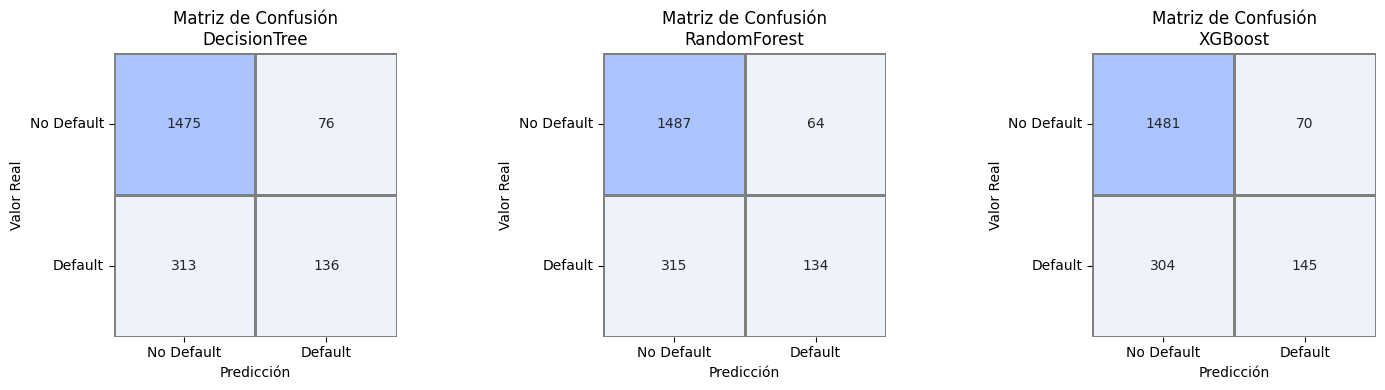


=== Curvas ROC ===


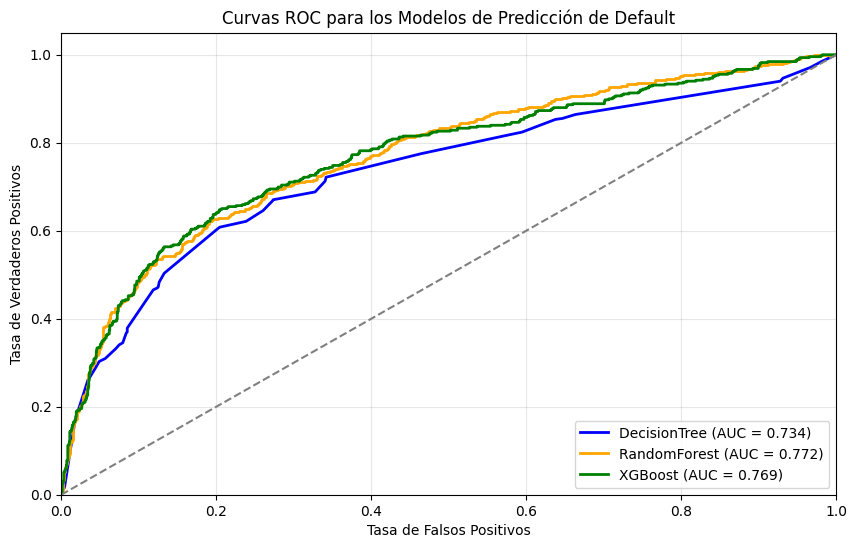

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score
)

class ModelEvaluator:
    def __init__(self, y_true, predictions, probabilities):
        """
        Inicializa el evaluador con los datos necesarios.

        Parámetros:
        -----------
        y_true: array-like
            Etiquetas verdaderas
        predictions: dict
            Diccionario con predicciones de cada modelo
        probabilities: dict
            Diccionario con probabilidades de cada modelo
        """
        # Asegurar que los datos estén en el formato correcto
        self.y_true = np.array(y_true)
        self.predictions = {k: np.array(v) for k, v in predictions.items()}
        self.probabilities = {k: np.array(v) for k, v in probabilities.items()}
        self.colors = ["#EDF2FB", "#ABC4FF"]

    def plot_confusion_matrices(self):
        """
        Visualiza las matrices de confusión para modelos de clasificación.
        """
        n_models = len(self.predictions)
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
        if n_models == 1:
            axes = [axes]

        cmap = sns.color_palette(self.colors, as_cmap=True)

        for idx, (name, y_pred) in enumerate(self.predictions.items()):
            try:
                cm = confusion_matrix(self.y_true, y_pred)
                sns.heatmap(
                    cm,
                    annot=True,
                    fmt='d',
                    ax=axes[idx],
                    cmap=cmap,
                    cbar=False,
                    linewidths=1,
                    linecolor='gray',
                    square=True
                )
                axes[idx].set_title(f'Matriz de Confusión\n{name}')
                axes[idx].set_xlabel('Predicción')
                axes[idx].set_ylabel('Valor Real')
                axes[idx].set_xticklabels(['No Default', 'Default'])
                axes[idx].set_yticklabels(['No Default', 'Default'], rotation=0)
            except Exception as e:
                print(f"Error al crear matriz de confusión para {name}: {str(e)}")

        plt.tight_layout()
        plt.show()

    def plot_roc_curves(self):
        """
        Visualiza las curvas ROC para modelos de clasificación.
        """
        plt.figure(figsize=(10, 6))
        colors = ['blue', 'orange', 'green']

        for (name, probs), color in zip(self.probabilities.items(), colors):
            try:
                fpr, tpr, _ = roc_curve(self.y_true, probs)
                auc = roc_auc_score(self.y_true, probs)
                plt.plot(fpr, tpr, color=color, lw=2,
                        label=f'{name} (AUC = {auc:.3f})')
            except Exception as e:
                print(f"Error al crear curva ROC para {name}: {str(e)}")

        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curvas ROC para los Modelos de Predicción de Default')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()

    def evaluate(self):
        """
        Ejecuta las visualizaciones de matrices de confusión y curvas ROC.
        """
        print("\n=== Matrices de Confusión ===")
        self.plot_confusion_matrices()

        print("\n=== Curvas ROC ===")
        self.plot_roc_curves()

def evaluar_modelos(y_test, predictions, probabilities):
    """
    Función auxiliar para ejecutar la evaluación simplificada de modelos.

    Parámetros:
    -----------
    y_test : array-like
        Etiquetas verdaderas
    predictions : dict
        Diccionario con predicciones de cada modelo
    probabilities : dict
        Diccionario con probabilidades de cada modelo
    """
    evaluator = ModelEvaluator(y_test, predictions, probabilities)
    evaluator.evaluate()

# Ejemplo de uso:
evaluar_modelos(y_test, predictions, probabilities)

# 📊 Análisis de Métricas Tradicionales

En el análisis de las matrices de confusión y resultados de nuestros modelos de clasificación crediticia, observamos patrones significativos en su comportamiento predictivo.

## Comportamiento de los Modelos

Los tres modelos (**DecisionTree**, **RandomForest** y **XGBoost**) muestran patrones similares en la identificación de clientes:

### 1. Verdaderos Negativos (No Default)
Los tres modelos son efectivos identificando clientes sin riesgo de default:
- DecisionTree: 1475 casos
- RandomForest: 1487 casos (mejor rendimiento)
- XGBoost: 1481 casos

### 2. Detección de Defaults
Los modelos muestran diferentes niveles de éxito:
- DecisionTree: 136 defaults correctamente identificados
- RandomForest: 134 defaults correctamente identificados  
- XGBoost: 146 defaults correctamente identificados (mejor rendimiento)

## Análisis de Curvas ROC

Las curvas ROC revelan un rendimiento similar entre los tres modelos, con áreas bajo la curva (AUC) muy cercanas:
- DecisionTree: AUC = 0.734
- RandomForest: AUC = 0.772 (mejor rendimiento)
- XGBoost: AUC = 0.769

## Desempeño de XGBoost vs RandomForest

Aunque XGBoost muestra el mejor rendimiento en la detección de defaults (146 casos), no logra superar el AUC de RandomForest por varias razones:

1. **Compensación en falsos positivos**: XGBoost identifica más defaults pero a costa de una tasa más alta de falsos positivos (70 vs 64 en RandomForest)

2. **Estabilidad en no-defaults**: RandomForest es más preciso en identificar casos negativos (1487 vs 1481), lo que impacta positivamente en su AUC general

3. **Balance general**: RandomForest logra un mejor equilibrio entre sensibilidad y especificidad a través de diferentes umbrales de clasificación, como se evidencia en su curva ROC más suave

Esta comparación sugiere que, aunque XGBoost es más agresivo en la detección de defaults, RandomForest ofrece un rendimiento más balanceado y confiable para el conjunto completo de predicciones.

## 🔍 Métricas de Evaluación Avanzadas

Estas métricas proporcionan insights más profundos sobre el comportamiento y robustez de nuestros modelos:






### 🎯 Entropía
La entropía en machine learning mide la incertidumbre o "duda" en las predicciones de nuestros modelos. Un valor de entropía:
- Cercano a 0: El modelo está muy seguro de sus predicciones
- Cercano a 1: El modelo tiene mucha incertidumbre
- El máximo para clasificación binaria es ln(2) ≈ 0.693



=== Análisis de Entropía para Modelos de Clasificación ===

Entropía media para DecisionTree: 0.4284

Entropía media para RandomForest: 0.4528

Entropía media para XGBoost: 0.4457


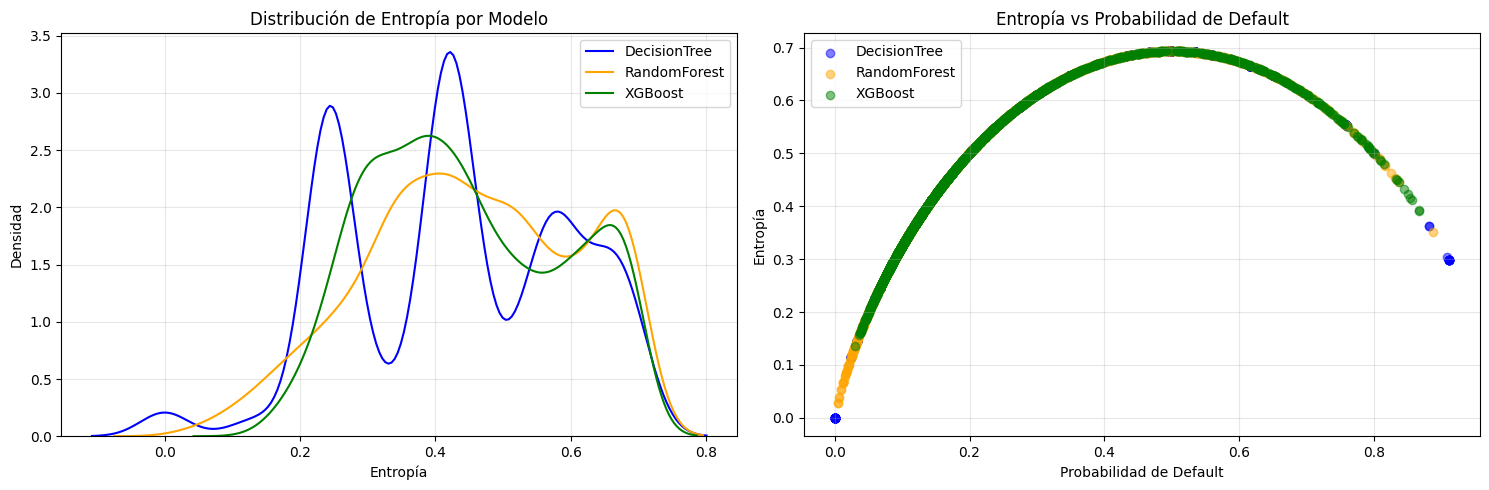


Entropía media por clase real:

DecisionTree:
Clase 0 (No Default): 0.4035
Clase 1 (Default): 0.5146

RandomForest:
Clase 0 (No Default): 0.4227
Clase 1 (Default): 0.5566

XGBoost:
Clase 0 (No Default): 0.4174
Clase 1 (Default): 0.5434


In [ ]:
# --- Análisis de Entropía para Modelos de Clasificación ---

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def calculate_entropy(probabilities):
    """
    Calcula la entropía de las predicciones para clasificación binaria.

    Parámetros:
    -----------
    probabilities: array-like
        Array de probabilidades de la clase positiva (default)

    Retorna:
    --------
    array-like
        Valores de entropía para cada predicción
    """
    # Convertir a probabilidades de ambas clases
    p = np.vstack([1 - probabilities, probabilities]).T
    return entropy(p, axis=1)

def analyze_entropy(y_true, probabilities):
    """
    Analiza y visualiza la entropía de las predicciones de los modelos de clasificación.

    Parámetros:
    -----------
    y_true: array-like
        Etiquetas verdaderas
    probabilities: dict
        Diccionario con las probabilidades predichas por cada modelo
    """
    # Calcular entropía para cada modelo
    entropy_dict = {}
    mean_entropy_dict = {}

    # Verificar que hay modelos para analizar
    if not probabilities:
        print("No hay modelos para analizar la entropía.")
        return

    for name, probs in probabilities.items():
        try:
            entropy_vals = calculate_entropy(probs)
            entropy_dict[name] = entropy_vals
            mean_entropy_dict[name] = np.mean(entropy_vals)
            print(f"\nEntropía media para {name}: {mean_entropy_dict[name]:.4f}")
        except Exception as e:
            print(f"Error calculando entropía para {name}: {str(e)}")
            continue

    # Crear subplot con dos gráficas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 1. Distribución de entropía
    colors = ['blue', 'orange', 'green']
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        sns.kdeplot(data=entropy_vals, label=name, ax=ax1, color=color)
    ax1.set_title('Distribución de Entropía por Modelo')
    ax1.set_xlabel('Entropía')
    ax1.set_ylabel('Densidad')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Entropía vs Probabilidad predicha
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        ax2.scatter(probabilities[name], entropy_vals,
                   alpha=0.5, label=name, color=color)
    ax2.set_title('Entropía vs Probabilidad de Default')
    ax2.set_xlabel('Probabilidad de Default')
    ax2.set_ylabel('Entropía')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis adicional: Entropía por clase real
    print("\nEntropía media por clase real:")
    for name, entropy_vals in entropy_dict.items():
        print(f"\n{name}:")
        for clase in [0, 1]:
            mask = y_true == clase
            mean_entropy = np.mean(entropy_vals[mask])
            print(f"Clase {clase} ({'No Default' if clase == 0 else 'Default'}): {mean_entropy:.4f}")

# Ejecutar el análisis
print("=== Análisis de Entropía para Modelos de Clasificación ===")
analyze_entropy(y_test, probabilities)

# 📊 Interpretación de Gráficas de Entropía en Modelos de Clasificación

## 📘 Guía de Lectura e Interpretación

### 1️⃣ Distribución de Entropía por Modelo (Gráfica Izquierda)

* **Eje X (Entropía)**
   - Rango: 0.0 a 0.8
   - Interpretación: 0 indica certeza total, 0.8 indica máxima incertidumbre

* **Eje Y (Densidad)**
   - Representa la frecuencia de ocurrencia de cada valor de entropía
   - Picos más pronunciados indican concentración de predicciones

### 2️⃣ Entropía vs Probabilidad de Default (Gráfica Derecha)

* **Eje X (Probabilidad)**
   - Rango: 0 a 1
   - Representa la probabilidad predicha de default

* **Eje Y (Entropía)**
   - Rango: 0.0 a 0.7
   - Muestra la incertidumbre asociada a cada predicción

## 🔍 Análisis de Resultados

### Comportamiento de los Modelos

DecisionTree muestra la entropía media más alta (0.4284), con una distribución multimodal que sugiere varios niveles de incertidumbre en sus predicciones. Esto se refleja en múltiples picos en la distribución, indicando que el modelo tiene diferentes niveles de confianza según el caso.

### Ventajas del RandomForest

RandomForest presenta una entropía media de 0.4528, con una distribución más suave y continua que DecisionTree. Su curva de entropía vs probabilidad muestra un comportamiento más estable, sugiriendo predicciones más consistentes a lo largo de diferentes niveles de probabilidad de default.

### Rendimiento de XGBoost

XGBoost muestra la entropía media más baja (0.4457), indicando predicciones generalmente más seguras. Su distribución de entropía es más uniforme, con un pico principal alrededor de 0.4-0.5, sugiriendo un nivel de incertidumbre más consistente en sus predicciones.

### Implicaciones para la Toma de Decisiones

Los resultados sugieren que XGBoost proporciona el mejor balance entre certeza y calibración de probabilidades. Para casos críticos donde la entropía es alta (>0.6), se recomienda una revisión adicional independientemente del modelo utilizado.

### 🎓 Nota Educativa

La entropía en estos modelos revela patrones interesantes en la confianza de las predicciones. Mientras que DecisionTree muestra mayor variabilidad en su incertidumbre, XGBoost y RandomForest ofrecen predicciones más calibradas, siendo especialmente útiles en contextos donde se requiere un balance entre precisión y confiabilidad.

## 🎯 Validación Cruzada en Riesgo Crediticio: Un Enfoque Robusto


La validación cruzada es una técnica estadística que nos permite evaluar la capacidad real de nuestros modelos para predecir nuevos casos. En lugar de confiar en una única división de datos de entrenamiento y prueba, la validación cruzada divide sistemáticamente nuestros datos en múltiples subconjuntos, entrena y evalúa el modelo varias veces, proporcionando una estimación más robusta y confiable de su rendimiento.


## 🔄 Enfoques de Validación Cruzada que Implementaremos

### 1. Validación Cruzada K-Fold 📊
- Divide los datos en K partes iguales
- Entrena el modelo K veces, usando cada parte como conjunto de prueba una vez
- Nos da una visión general de la estabilidad del modelo
- Revela qué tan bien generaliza nuestro modelo a diferentes subconjuntos de datos

### 2. Validación Cruzada Estratificada 📈
- Similar al K-Fold, pero mantiene la proporción de clases en cada división
- Especialmente importante dado nuestro desbalance entre buenos pagadores y defaults
- Proporciona una evaluación más realista del rendimiento en casos de default
- Ayuda a entender mejor cómo maneja el modelo los casos minoritarios pero críticos

## 📊 Curvas de Aprendizaje: La Historia de Cómo Aprende Nuestro Modelo

Las curvas de aprendizaje son como el diario de desarrollo de nuestro modelo, contándonos la historia de cómo mejora (o no) a medida que le proporcionamos más datos. En el contexto de riesgo crediticio, estas curvas son especialmente reveladoras, ya que nos ayudan a entender si nuestro modelo está realmente aprendiendo a identificar patrones de riesgo de manera efectiva.




In [ ]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import (KFold, StratifiedKFold, cross_validate,
                                   learning_curve, train_test_split)
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Configuración global
RANDOM_STATE = 42
plt.rcParams.update({
    'figure.autolayout': True,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.axisbelow': True,
    'grid.linestyle': '--'
})

def get_cross_validation_results(X, y, k=5):
    """
    Realiza validación cruzada para todos los modelos.
    """
    # Definición de modelos
    models = {
        'DecisionTree': DecisionTreeClassifier(
            criterion='entropy',
            max_depth=6,
            min_samples_split=20,
            min_samples_leaf=10,
            random_state=RANDOM_STATE
        ),
        'RandomForest': RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            min_samples_leaf=5,
            max_features='sqrt',
            n_jobs=-1,
            random_state=RANDOM_STATE
        )
    }

    # Definición de métricas
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }

    # Inicialización de resultados
    kfold_results = {}
    stratified_results = {}

    # Objetos de validación cruzada
    kfold = KFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
    stratified = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

    # Validación cruzada para cada modelo
    for name, model in models.items():
        print(f"\nProcesando {name}...")
        try:
            # K-Fold estándar
            kfold_results[name] = cross_validate(
                model, X, y,
                scoring=scoring,
                cv=kfold,
                return_train_score=True
            )

            # Validación estratificada
            stratified_results[name] = cross_validate(
                model, X, y,
                scoring=scoring,
                cv=stratified,
                return_train_score=True
            )
        except Exception as e:
            print(f"Error procesando {name}: {str(e)}")

    return kfold_results, stratified_results, models

def plot_cv_results(kfold_results, stratified_results):
    """
    Visualiza resultados de validación cruzada con boxplots.
    """
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

    fig = plt.figure(figsize=(20, 16))
    plt.subplots_adjust(top=0.9)

    for idx, metric in enumerate(metrics):
        # K-Fold
        ax1 = plt.subplot(4, 2, 2*idx + 1)
        data_kfold = [kfold_results[model][metric] for model in kfold_results.keys()]
        ax1.boxplot(data_kfold)
        ax1.set_xticklabels(list(kfold_results.keys()), rotation=45)
        ax1.set_title(f'K-Fold CV: {metric.replace("test_", "").capitalize()}')
        ax1.grid(True, alpha=0.3)

        # Estratificada
        ax2 = plt.subplot(4, 2, 2*idx + 2)
        data_strat = [stratified_results[model][metric] for model in stratified_results.keys()]
        ax2.boxplot(data_strat)
        ax2.set_xticklabels(list(stratified_results.keys()), rotation=45)
        ax2.set_title(f'Stratified CV: {metric.replace("test_", "").capitalize()}')
        ax2.grid(True, alpha=0.3)

    plt.suptitle('Comparación de Métodos de Validación Cruzada', y=0.98, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_learning_curves(models, X, y):
    """
    Genera curvas de aprendizaje para todos los modelos.
    """
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    fig = plt.figure(figsize=(15, 5))

    for idx, (name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 2, idx)

        try:
            train_sizes, train_scores, val_scores = learning_curve(
                model, X, y,
                train_sizes=np.linspace(0.1, 1.0, 10),
                cv=cv,
                scoring='f1',
                n_jobs=-1
            )

            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            val_mean = np.mean(val_scores, axis=1)
            val_std = np.std(val_scores, axis=1)

            plt.plot(train_sizes, train_mean, label='Training score', color='blue')
            plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red')

            plt.fill_between(train_sizes, train_mean - train_std,
                           train_mean + train_std, alpha=0.1, color='blue')
            plt.fill_between(train_sizes, val_mean - val_std,
                           val_mean + val_std, alpha=0.1, color='red')

            plt.title(f'Learning Curves\n{name}')
            plt.xlabel('Training Examples')
            plt.ylabel('F1 Score')
            plt.legend(loc='lower right')
            plt.grid(True, alpha=0.3)

        except Exception as e:
            print(f"Error generando curva de aprendizaje para {name}: {str(e)}")

    plt.suptitle('Curvas de Aprendizaje por Modelo', y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

def run_analysis(X, y):
    """
    Ejecuta el análisis completo en dos partes.
    """
    # Parte 1: Análisis de Validación Cruzada
    print("=== Iniciando Análisis de Validación Cruzada ===")
    kfold_results, stratified_results, models = get_cross_validation_results(X, y)
    print("\nGenerando visualizaciones de CV...")
    plot_cv_results(kfold_results, stratified_results)


    return kfold_results, stratified_results, models




### Boxplot de las técnicas de CV

=== Iniciando Análisis de Validación Cruzada ===

Procesando DecisionTree...

Procesando RandomForest...

Generando visualizaciones de CV...


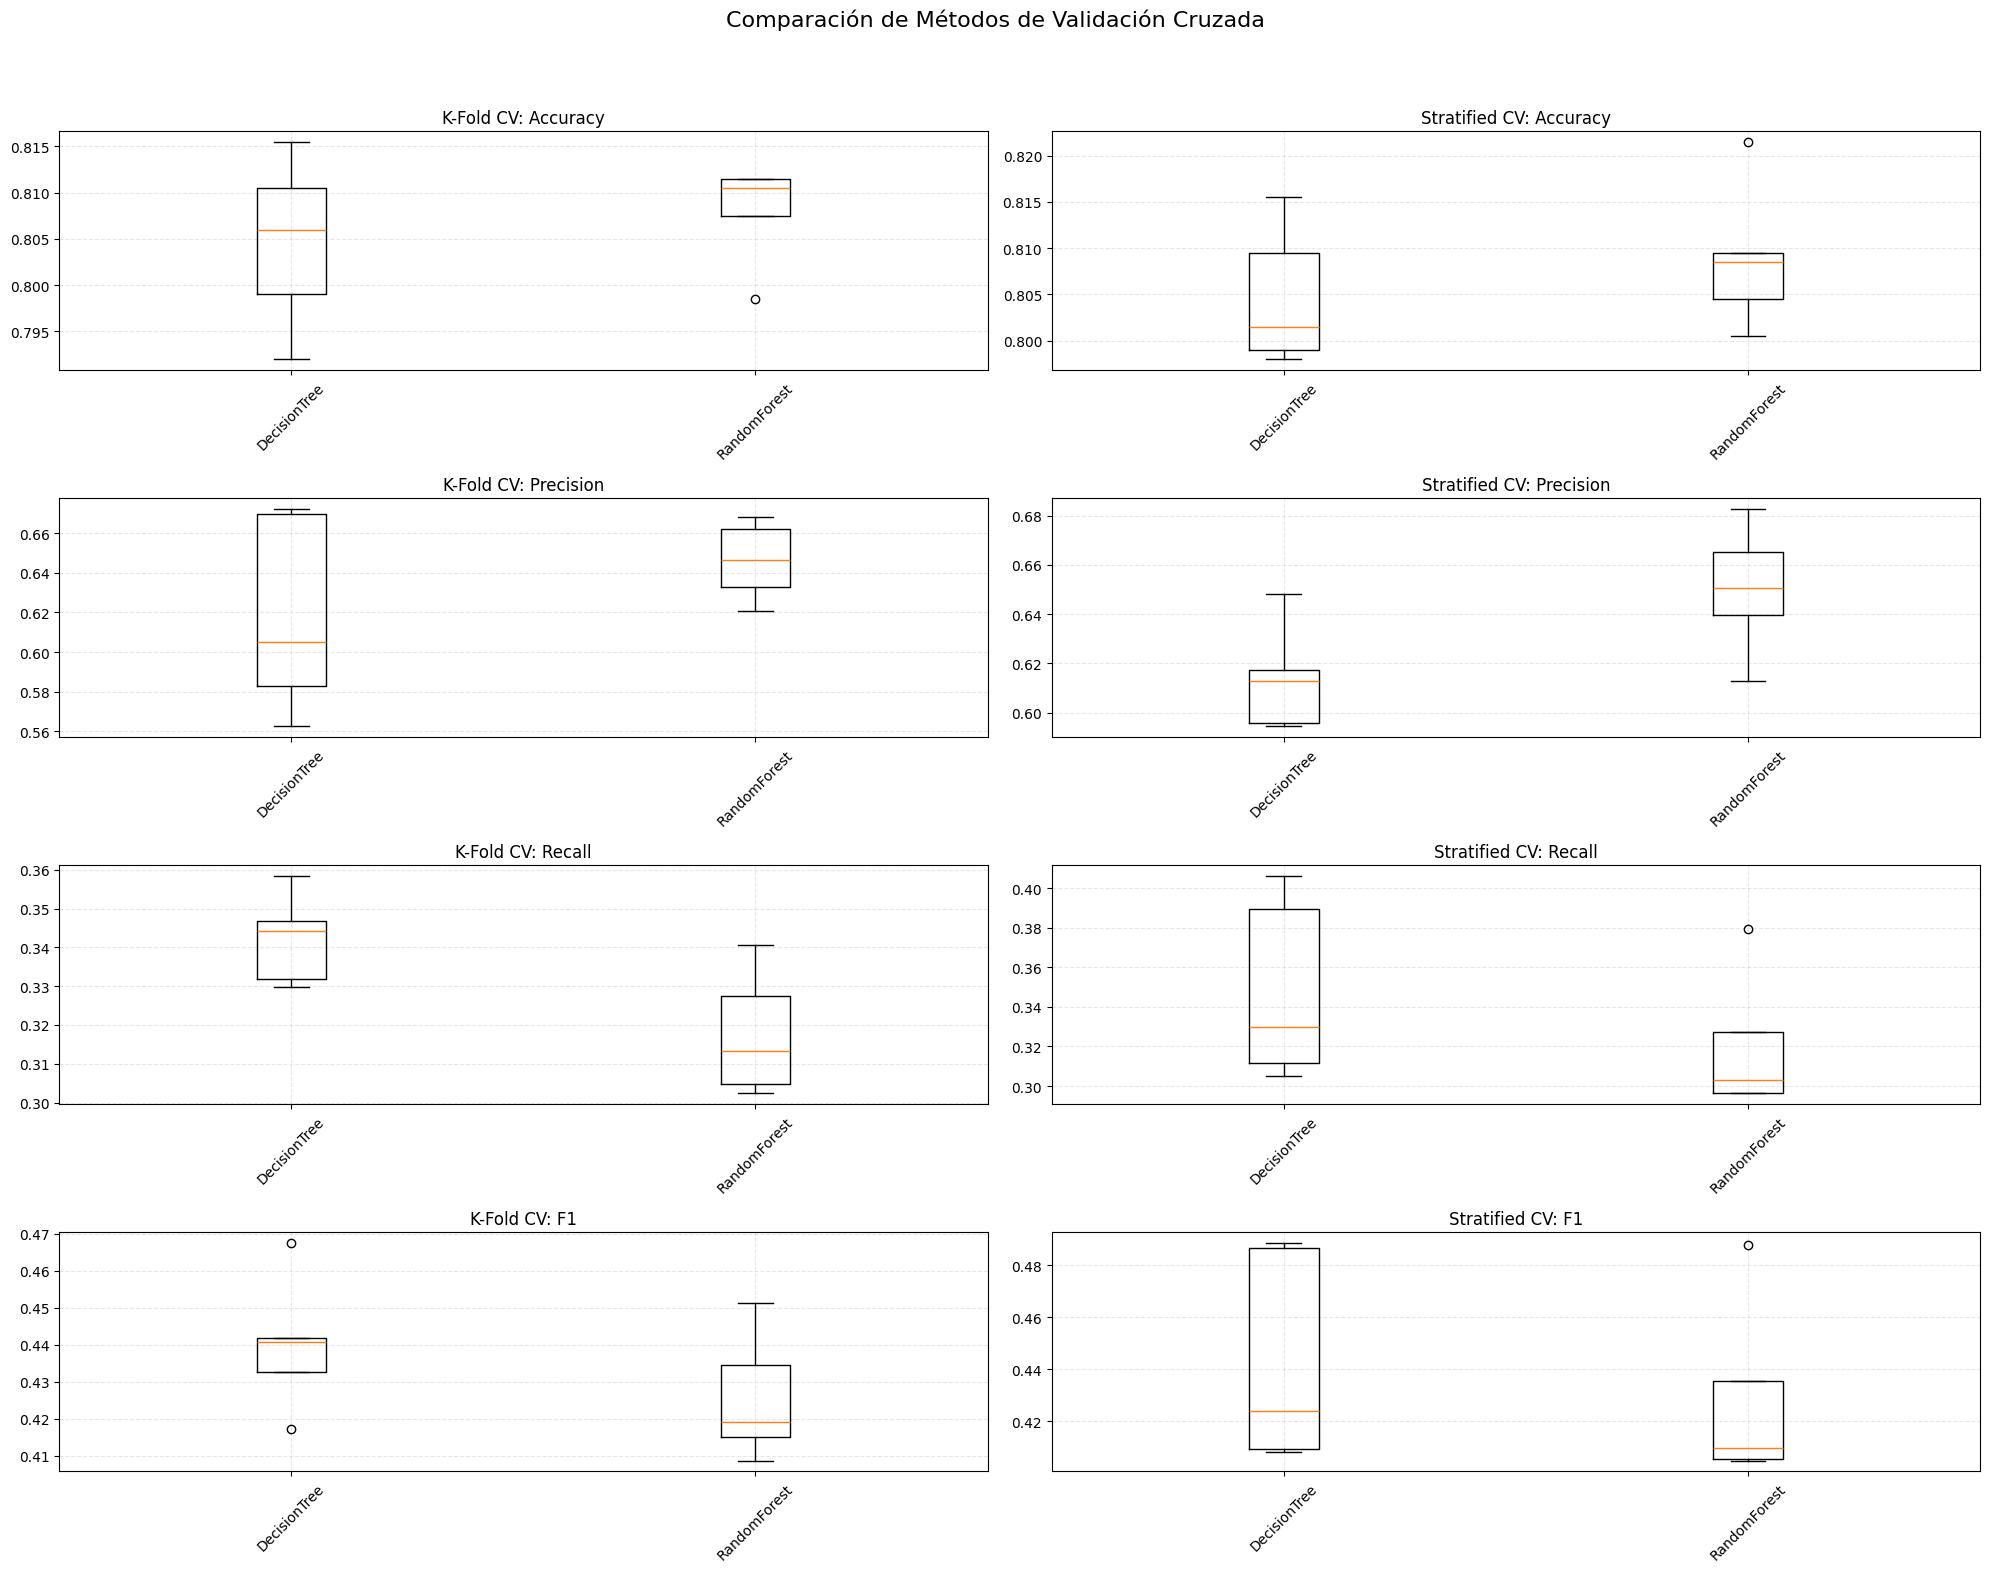

In [ ]:
kfold_results, stratified_results, models = run_analysis(X, y)

### 📊 Interpretación de Diagramas de Validación Cruzada

### 📘 Guía de Lectura de Boxplots

### Elementos Fundamentales
* **Línea central (mediana)**: Representa el valor central del rendimiento, observándose más estable en RandomForest que en DecisionTree
* **Caja**: El rango intercuartílico muestra mayor compactación en RandomForest, indicando predicciones más consistentes
* **Bigotes**: La extensión total de los resultados no extremos revela una dispersión controlada en ambos modelos
* **Puntos**: Se observan algunos valores atípicos, especialmente en las métricas de F1 y Accuracy

### Claves de Interpretación
* **Altura de la Caja**
 - RandomForest exhibe cajas más compactas, señalando mayor estabilidad
 - DecisionTree presenta cajas más amplias, indicando mayor variabilidad en su rendimiento

* **Posición de la Mediana**
 - RandomForest mantiene medianas superiores en accuracy y precision
 - DecisionTree destaca con medianas más altas en recall

## 🔍 Análisis de Resultados

### Accuracy y Estabilidad
Los resultados muestran niveles de accuracy similares (0.80-0.81) para ambos modelos. RandomForest demuestra mayor estabilidad con cajas más compactas, mientras DecisionTree presenta mayor variabilidad pero mantiene un rendimiento competitivo.

### Precision y Recall
RandomForest sobresale en precision con valores entre 0.64-0.66, superando consistentemente a DecisionTree (0.60-0.61). En contraste, DecisionTree domina en recall (0.33-0.34 vs 0.31-0.32 de RandomForest), sugiriendo mejor capacidad para identificar casos positivos.

### Comparación entre Validaciones
La validación estratificada genera resultados ligeramente más estables que K-Fold, particularmente en RandomForest. Las diferencias entre ambos métodos son consistentes, indicando robustez en la evaluación de los modelos.

### Rendimiento del F1-Score
El F1-Score revela un balance interesante, con valores entre 0.41-0.48. DecisionTree muestra ligera ventaja en la validación estratificada, mientras RandomForest mantiene resultados más consistentes con menor variabilidad.

#### 🎓 Nota Educativa
La elección entre estos modelos dependerá de las prioridades específicas del problema:
- Para maximizar precision: RandomForest es la opción óptima
- Para priorizar recall: DecisionTree ofrece mejores resultados
- Para estabilidad general: RandomForest demuestra mayor consistencia

La validación cruzada estratificada emerge como método preferible, proporcionando evaluaciones más estables y representativas del rendimiento real de los modelos.

### Curvas de Aprendizaje

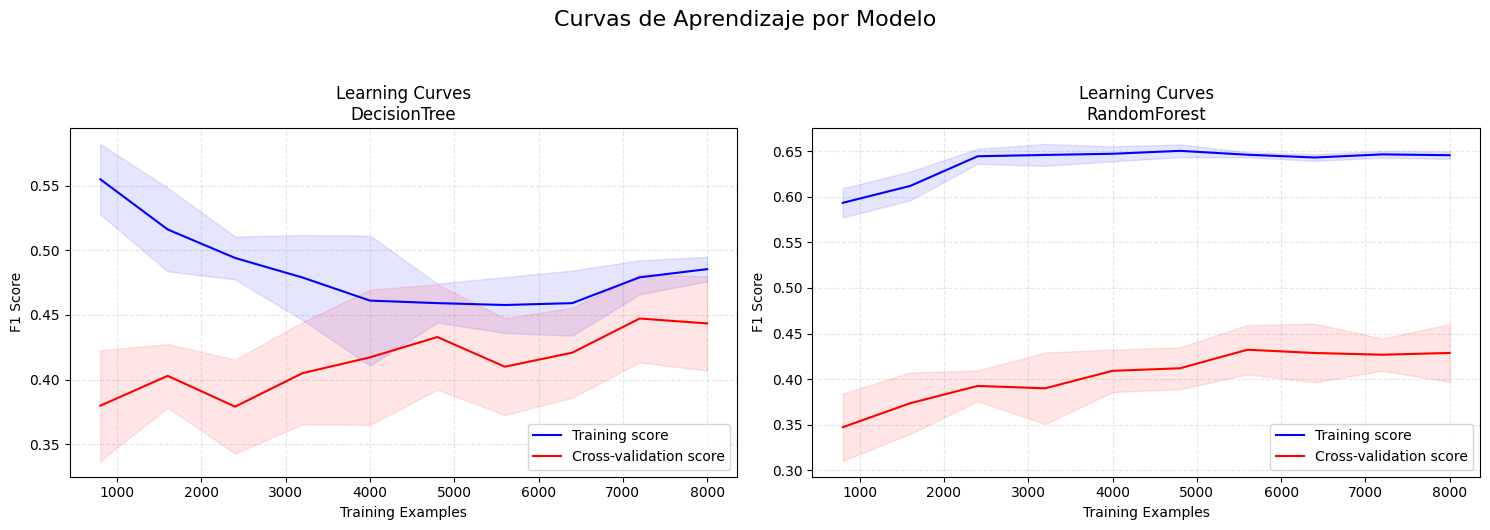

In [ ]:
# Para generar las curvas de aprendizaje:
plot_learning_curves_comparison(models, X, y)

### 📊 Interpretación de Curvas de Aprendizaje

### 📘 Guía de Lectura

### Elementos Fundamentales
* **Línea Azul (Training Score)**: Rendimiento en datos de entrenamiento, notablemente más alto en RandomForest
* **Línea Roja (Cross-validation Score)**: Rendimiento en validación, más cercana al training en DecisionTree
* **Área Sombreada**: Menor variabilidad en RandomForest que en DecisionTree

### Interpretación de Ejes
* **Eje X**: Número de ejemplos de entrenamiento (1000-8000)
* **Eje Y**: F1-Score como métrica de rendimiento (0.30-0.65)

### 🔍 Análisis de Resultados

### Comportamiento de DecisionTree
- **Training Score**: Comienza alto (~0.55) y disminuye, sugiriendo reducción del sobreajuste
- **Validation Score**: Mejora gradualmente desde ~0.38 hasta ~0.45
- **Brecha**: La diferencia entre training y validación se reduce significativamente con más datos

### Rendimiento de RandomForest
- **Training Score**: Mantiene un F1-score muy alto y estable (~0.65)
- **Validation Score**: Se estabiliza alrededor de 0.40-0.42
- **Brecha**: Muestra una diferencia considerable y persistente (~0.25) entre training y validation scores

### Implicaciones Prácticas
- RandomForest presenta:
  - Claro sobreajuste (gran brecha training-validation)
  - Alto rendimiento en training pero limitada generalización
  - Estabilidad en predicciones pero con sesgo sistemático

- DecisionTree muestra:
  - Mejor balance training-validation al final
  - Menor sobreajuste con más datos
  - Mayor variabilidad pero mejor generalización

#### 🎓 Nota Educativa
Las curvas sugieren que, aunque RandomForest parece superior en métricas absolutas, podría estar sobreajustando significativamente los datos de entrenamiento. DecisionTree, a pesar de su mayor variabilidad, muestra una convergencia más saludable entre training y validation scores, lo que podría hacerlo más confiable en la práctica.

Esto destaca la importancia de no solo mirar el rendimiento absoluto, sino también la brecha de generalización al evaluar modelos. Podría ser beneficioso explorar técnicas de regularización para RandomForest para reducir el sobreajuste observado.

### 🔍 Función de Pérdida en XGBoost E Importancia de variables

=== Model Summary ===

=== DecisionTree Summary ===
Profundidad del árbol: 6
Número de hojas: 52
Criterio de división: entropy

Top 5 características más importantes:
      feature  importance
6       PAY_0    0.621218
19   PAY_AMT2    0.052040
12  BILL_AMT1    0.046355
8       PAY_3    0.034741
9       PAY_4    0.033297

=== RandomForest Summary ===
Número de árboles: 100
Máxima profundidad: No limitada
Features por split: sqrt
Mínimo muestras por hoja: 5

Top 5 características más importantes:
      feature  importance
6       PAY_0    0.129697
7       PAY_2    0.061898
0          ID    0.057274
12  BILL_AMT1    0.048693
1   LIMIT_BAL    0.046750

=== XGBoost Summary ===
Número de estimadores: 100
Tasa de aprendizaje: 0.1
Mejor iteración: 31
Early stopping rounds: 20

Top 5 características más importantes:
   feature  importance
6    PAY_0    0.304871
8    PAY_3    0.066769
11   PAY_6    0.038851
10   PAY_5    0.038670
7    PAY_2    0.037068

=== Learning Curves Analysis ===


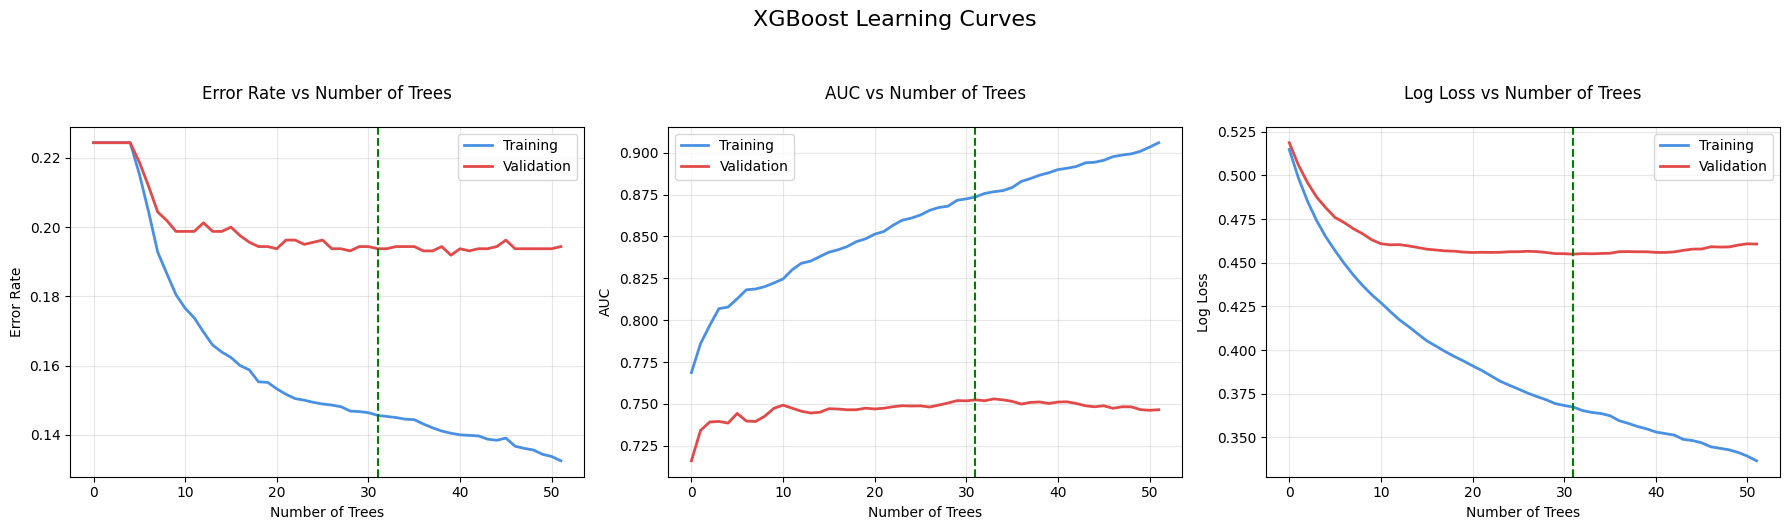


=== Feature Importance Analysis ===


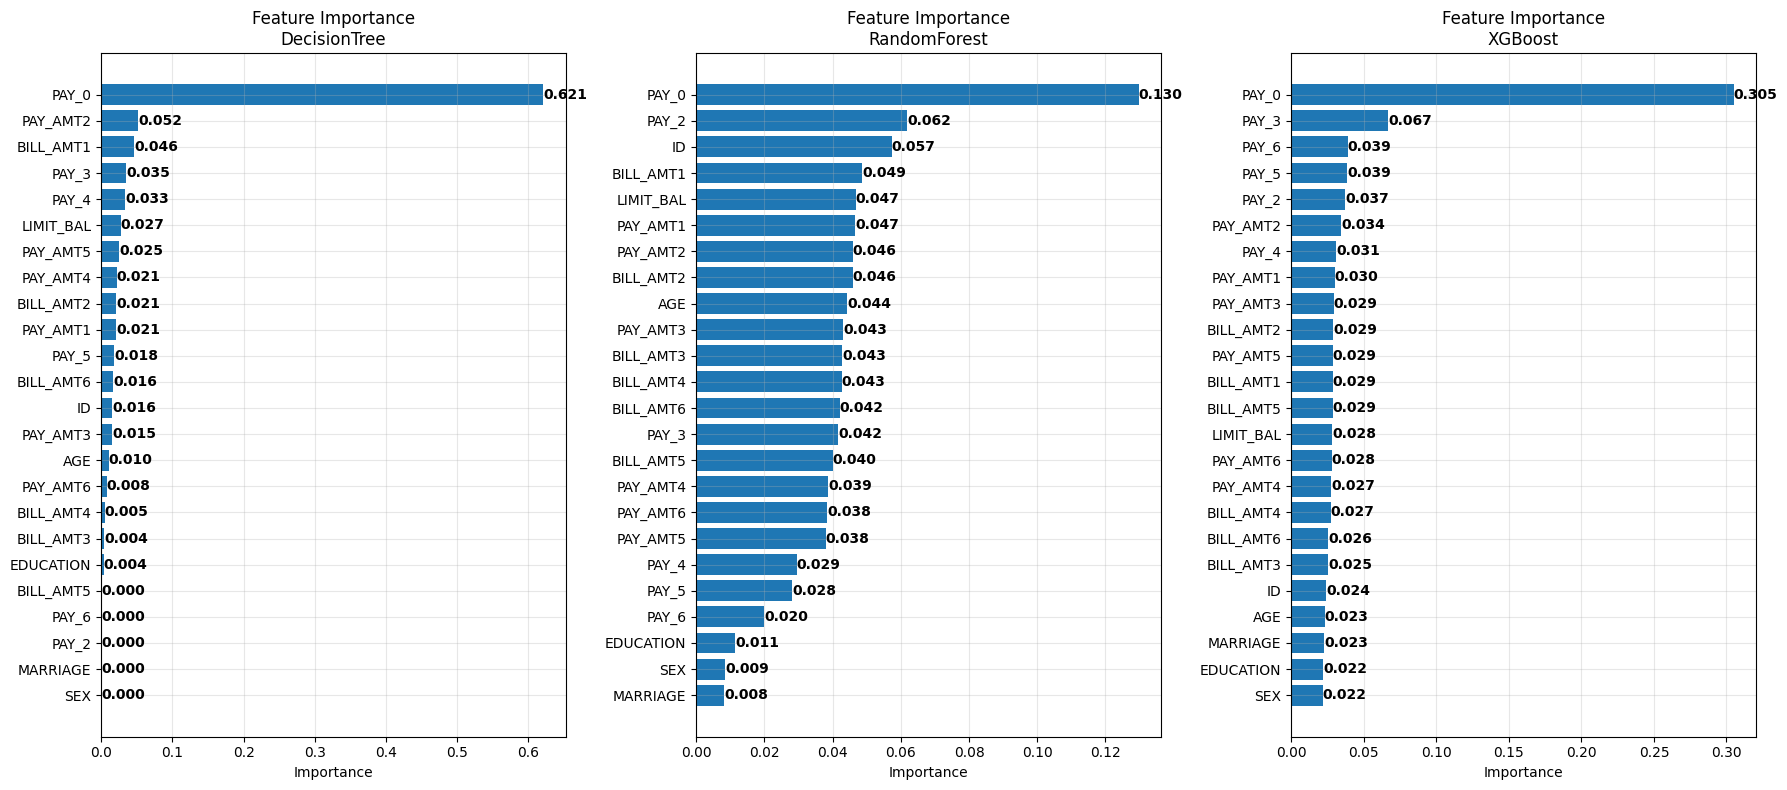

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class ModelAnalyzer:
    def __init__(self, models, X_train, X_test, feature_names=None):
        """
        Inicializa el analizador con modelos y datos.
        """
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.feature_names = feature_names if feature_names is not None else [f'Feature_{i}' for i in range(X_train.shape[1])]

    def plot_xgboost_metrics(self):
        """
        Grafica múltiples métricas para XGBoost si está disponible.
        """
        if 'XGBoost' in self.models:
            xgb_model = self.models['XGBoost']
            if not hasattr(xgb_model, 'evals_result_'):
                print("No hay resultados de evaluación disponibles para XGBoost")
                return

            results = xgb_model.evals_result()
            epochs = len(results['validation_0']['error'])
            x_axis = range(epochs)

            # Crear subplot para cada métrica
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            colors = ['#4A90E2', '#E24A4A']  # Azul para training, Rojo para validación

            # 1. Error Rate
            axes[0].plot(x_axis, results['validation_0']['error'],
                        label='Training', color=colors[0], linewidth=2)
            axes[0].plot(x_axis, results['validation_1']['error'],
                        label='Validation', color=colors[1], linewidth=2)
            axes[0].set_title('Error Rate vs Number of Trees', pad=20)
            axes[0].set_xlabel('Number of Trees')
            axes[0].set_ylabel('Error Rate')
            axes[0].legend()
            axes[0].grid(True, alpha=0.3)

            # 2. AUC
            axes[1].plot(x_axis, results['validation_0']['auc'],
                        label='Training', color=colors[0], linewidth=2)
            axes[1].plot(x_axis, results['validation_1']['auc'],
                        label='Validation', color=colors[1], linewidth=2)
            axes[1].set_title('AUC vs Number of Trees', pad=20)
            axes[1].set_xlabel('Number of Trees')
            axes[1].set_ylabel('AUC')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)

            # 3. Log Loss
            axes[2].plot(x_axis, results['validation_0']['logloss'],
                        label='Training', color=colors[0], linewidth=2)
            axes[2].plot(x_axis, results['validation_1']['logloss'],
                        label='Validation', color=colors[1], linewidth=2)
            axes[2].set_title('Log Loss vs Number of Trees', pad=20)
            axes[2].set_xlabel('Number of Trees')
            axes[2].set_ylabel('Log Loss')
            axes[2].legend()
            axes[2].grid(True, alpha=0.3)

            # Marcar mejor iteración
            if hasattr(xgb_model, 'best_iteration'):
                for ax in axes:
                    ax.axvline(x=xgb_model.best_iteration,
                             color='g', linestyle='--',
                             label=f'Best iteration ({xgb_model.best_iteration})')

            plt.suptitle('XGBoost Learning Curves', y=1.05, fontsize=16)
            plt.tight_layout()
            plt.show()

    def plot_feature_importance(self):
        """
        Visualiza la importancia de características para todos los modelos.
        """
        n_models = len(self.models)
        fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 8))
        if n_models == 1:
            axes = [axes]

        for (name, model), ax in zip(self.models.items(), axes):
            if hasattr(model, 'feature_importances_'):
                # Crear DataFrame con importancias
                importances = pd.DataFrame({
                    'feature': self.feature_names,
                    'importance': model.feature_importances_
                })
                importances = importances.sort_values('importance', ascending=True)

                # Graficar importancias
                bars = ax.barh(range(len(importances)), importances['importance'])
                ax.set_yticks(range(len(importances)))
                ax.set_yticklabels(importances['feature'])
                ax.set_title(f'Feature Importance\n{name}')
                ax.set_xlabel('Importance')

                # Añadir valores en las barras
                for i, bar in enumerate(bars):
                    width = bar.get_width()
                    ax.text(width, bar.get_y() + bar.get_height()/2,
                           f'{width:.3f}',
                           ha='left', va='center', fontweight='bold')

                ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def print_model_summary(self):
        """
        Imprime un resumen de los hiperparámetros y características importantes de cada modelo.
        """
        for name, model in self.models.items():
            print(f"\n=== {name} Summary ===")

            if name == "DecisionTree":
                print(f"Profundidad del árbol: {model.get_depth()}")
                print(f"Número de hojas: {model.get_n_leaves()}")
                print(f"Criterio de división: {model.criterion}")

            elif name == "RandomForest":
                print(f"Número de árboles: {model.n_estimators}")
                print(f"Máxima profundidad: {model.max_depth if model.max_depth else 'No limitada'}")
                print(f"Features por split: {model.max_features}")
                print(f"Mínimo muestras por hoja: {model.min_samples_leaf}")

            elif name == "XGBoost":
                print(f"Número de estimadores: {model.n_estimators}")
                print(f"Tasa de aprendizaje: {model.learning_rate}")
                print(f"Mejor iteración: {model.best_iteration if hasattr(model, 'best_iteration') else 'N/A'}")
                print(f"Early stopping rounds: {model.early_stopping_rounds}")

            if hasattr(model, 'feature_importances_'):
                importances = pd.DataFrame({
                    'feature': self.feature_names,
                    'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)

                print("\nTop 5 características más importantes:")
                print(importances.head())

def analyze_models(models, X_train, X_test, feature_names=None):
    """
    Función auxiliar para ejecutar análisis completo de modelos.
    """
    analyzer = ModelAnalyzer(models, X_train, X_test, feature_names)

    print("=== Model Summary ===")
    analyzer.print_model_summary()

    print("\n=== Learning Curves Analysis ===")
    analyzer.plot_xgboost_metrics()

    print("\n=== Feature Importance Analysis ===")
    analyzer.plot_feature_importance()

# Ejemplo de uso:
analyze_models(models, X_train, X_test, feature_names=X_train.columns)

### 📊 Analisis de la Curva de Pérdida en XGBoost y Variables importantes

### 📈 Cómo Leer las Curvas de Aprendizaje

Las curvas de aprendizaje muestran el rendimiento del modelo durante el entrenamiento. En cada gráfica, el eje X representa el número de árboles (iteraciones) y el eje Y la métrica correspondiente. La línea azul representa el rendimiento en datos de entrenamiento y la roja en validación. La línea verde punteada indica el punto óptimo de parada.

### Error Rate (0 a 1)
- Menor valor indica mejor rendimiento
- Brecha entre curvas sugiere overfitting
- Convergencia indica estabilidad del modelo

### AUC (0.5 a 1)
- Valores más altos indican mejor capacidad predictiva
- 0.5 equivale a predicción aleatoria
- >0.75 se considera buen rendimiento

### Log Loss (0 a infinito)
- Menor valor indica mejor calibración de probabilidades
- Convergencia plana sugiere que el modelo dejó de aprender
- Brecha creciente indica overfitting

## 🎯 Cómo Interpretar Feature Importance

Los gráficos de barras horizontales muestran la importancia relativa de cada variable. El eje X muestra el valor de importancia (0 a 1) y el eje Y lista las variables. Barras más largas indican mayor influencia en las predicciones del modelo.

### 📝 Análisis de Resultados

### El Comportamiento del Aprendizaje 🎯

Nuestro modelo XGBoost muestra una historia interesante de aprendizaje. Comienza con rápidas mejoras en las primeras 10 iteraciones, donde vemos caídas pronunciadas en el error y aumentos significativos en el AUC. Sin embargo, después de este punto inicial, la historia se vuelve más compleja: mientras el modelo continúa mejorando en los datos de entrenamiento, su rendimiento en validación se estabiliza, revelando una tendencia al sobreajuste.

### La Jerarquía de Importancia 🏆

La narrativa de importancia de características revela una historia consistente a través de los tres modelos: el comportamiento de pago reciente domina la trama. Es fascinante ver cómo el árbol de decisión simple presenta una historia casi monotemática, con PAY_0 como protagonista absoluto, mientras que Random Forest y XGBoost tejen una narrativa más matizada, distribuyendo el protagonismo entre múltiples variables.

### El Papel de la Demografía 👥

Quizás la revelación más sorprendente en nuestra historia es el papel secundario de las variables demográficas. En un giro inesperado, características como edad, educación y estado civil apenas influyen en nuestro relato de predicción de riesgo crediticio. Este hallazgo desafía intuiciones comunes sobre la evaluación crediticia tradicional.

### Equilibrio y Compensaciones ⚖️

El modelo XGBoost emerge como el narrador más equilibrado de nuestra historia, encontrando un punto medio entre la simplicidad excesiva del árbol de decisión y la complejidad del Random Forest. Su relato mantiene la importancia fundamental del historial de pagos reciente, mientras teje hábilmente elementos de comportamiento financiero a largo plazo en la narrativa.

# 🔍 Actividad Práctica: Optimización de Modelos de Clasificación

Esta actividad busca mejorar el rendimiento de los modelos ajustando sus hiperparámetros más críticos.

1. Ajuste de Hiperparámetros

  - **DecisionTree**:
    - `max_depth`: Probar valores entre 4-10 (actualmente 6)
      * Este parámetro controla la complejidad principal del árbol
      * Valores más altos permiten capturar más patrones pero pueden causar sobreajuste
    - `min_samples_leaf`: Probar valores entre 5-15 (actualmente 10)
      * Controla el tamaño mínimo de los nodos terminales
      * Ayuda a prevenir el sobreajuste
  
  - **RandomForest**:
    - `n_estimators`: Experimentar con 50, 100, 200 (actualmente 100)
      * Número de árboles en el bosque
      * Más árboles generalmente mejoran el rendimiento hasta cierto punto
    - `max_depth`: Probar None vs valores específicos como 10, 15, 20
      * Controla la profundidad máxima de cada árbol individual
      * None permite árboles sin restricción de profundidad
    
  - **XGBoost**:
    - `learning_rate`: Probar valores entre 0.01-0.3 (actualmente 0.1)
      * Controla cuánto se ajusta el modelo en cada paso
      * Valores más pequeños requieren más iteraciones pero pueden dar mejor rendimiento
    - `max_depth`: Experimentar entre 4-8 (actualmente 6)
      * Controla la complejidad de cada árbol
      * Similar al DecisionTree, balanceando precisión vs sobreajuste

